# Taming Text

In [1]:
# Normal stack of pandas, numpy, matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import nltk
from os import path
from wordcloud import WordCloud # pip install wordcloud
from PIL import Image

%matplotlib inline

First and foremost lets just load the data:

In [2]:
folder = 'hillary-clinton-emails/'
aliases = pd.read_csv(folder + 'Aliases.csv', index_col='Id')
email_receivers = pd.read_csv(folder + 'EmailReceivers.csv', index_col='Id')
emails = pd.read_csv(folder + 'Emails.csv', index_col='Id')
persons = pd.read_csv(folder + 'Persons.csv', index_col='Id')

In [3]:
aliases.head()

,Alias,PersonId
Id,,
1,111th congress,1
2,agna usemb kabul afghanistan,2
3,ap,3
4,asuncion,4
5,alec,5


In [4]:
email_receivers.head()

,EmailId,PersonId
Id,,
1,1,80
2,2,80
3,3,228
4,3,80
5,4,80


In [5]:
emails.head()

,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,MetadataDocumentClass,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
Id,,,,,,,,,,,,,,,,,,,,,
1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,HRC_Email_296,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,HRC_Email_296,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,HRC_Email_296,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,HRC_Email_296,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,HRC_Email_296,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


In [6]:
emails.columns

Index(['DocNumber', 'MetadataSubject', 'MetadataTo', 'MetadataFrom',
       'SenderPersonId', 'MetadataDateSent', 'MetadataDateReleased',
       'MetadataPdfLink', 'MetadataCaseNumber', 'MetadataDocumentClass',
       'ExtractedSubject', 'ExtractedTo', 'ExtractedFrom', 'ExtractedCc',
       'ExtractedDateSent', 'ExtractedCaseNumber', 'ExtractedDocNumber',
       'ExtractedDateReleased', 'ExtractedReleaseInPartOrFull',
       'ExtractedBodyText', 'RawText'],
      dtype='object')

In [7]:
emailsList = emails['ExtractedBodyText'].tolist()
cleanedList = [str(x) for x in emailsList if str(x) != 'nan']

In [8]:
rawExtractedBody = ' '.join(cleanedList)

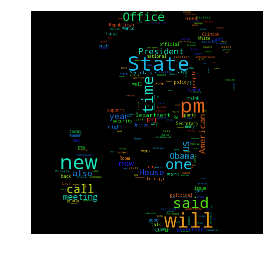

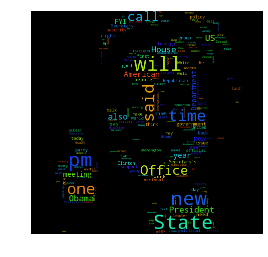

In [9]:
def generate_word_cloud(text):
    mask = np.array(Image.open("hillary_mask_1.jpg"))
    
    # Generate a word cloud image
    wordcloud = WordCloud(mask=mask).generate(text)
    
    # Display the generated image:
    plt.imshow(wordcloud)
    plt.axis("off")

    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40, mask=mask).generate(text)
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
generate_word_cloud(rawExtractedBody)

## Preprosessing

- Tokenizing
- Stemming
- Stop word removal

In [10]:
from nltk.tokenize import RegexpTokenizer

# Make a tokenizer that only the words (e.g. remove punctuation)
tokenizer = RegexpTokenizer(r'\w+')

In [11]:
tokens = pd.Series(tokenizer.tokenize(rawExtractedBody))
tokens.head(15)

0           B6
1     Thursday
2        March
3            3
4         2011
5            9
6           45
7           PM
8            H
9       Latest
10         How
11       Syria
12          is
13      aiding
14     Qaddafi
dtype: object

### Stemming

In [12]:
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')

stemmed = tokens.apply(stemmer.stem)

In [13]:
stemmed.head(15)

0           b6
1     thursday
2        march
3            3
4         2011
5            9
6           45
7           pm
8            h
9       latest
10         how
11       syria
12          is
13         aid
14     qaddafi
dtype: object

### Stopword removal

In [14]:
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))

no_stopwords = stemmed[stemmed.apply(lambda x: x not in stop)]

In [15]:
no_stopwords.head(15)

0           b6
1     thursday
2        march
3            3
4         2011
5            9
6           45
7           pm
8            h
9       latest
11       syria
13         aid
14     qaddafi
17         sid
18         hrc
dtype: object

In [16]:
no_stopwords.shape

(368718,)

In [17]:
print('Removing stopwords took away %.2f%% of the words' % (100*(1 - no_stopwords.shape[0] / stemmed.shape[0])))

Removing stopwords took away 41.13% of the words


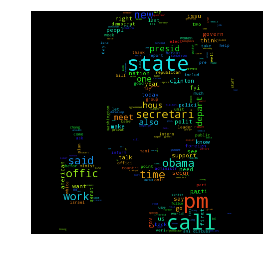

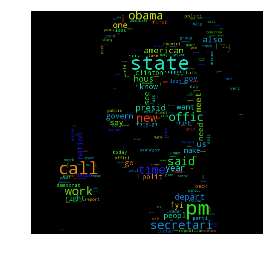

In [18]:
generate_word_cloud(no_stopwords.to_string(index=False, header=False))

## 2.


In [77]:
emailsList = pd.Series(emails['ExtractedBodyText'].astype(str))


In [95]:
# Drop nans
emailsList = emailsList[emailsList.apply(lambda x: x != 'nan')]



### Country lookup

In [101]:
import pycountry # pip install pycountry
len(pycountry.countries)

249

In [102]:
countries = [c.name for c in pycountry.countries]
countries[:10]

['Aruba',
 'Afghanistan',
 'Angola',
 'Anguilla',
 'Åland Islands',
 'Albania',
 'Andorra',
 'United Arab Emirates',
 'Argentina',
 'Armenia']

In [103]:
def lookup_country(email):
    counts = {}
    for country in countries:
        count = email.count(country)
        if count != 0:
            counts[country] = count
    if counts:       
        # Get the country with highest count        
        top_country = max(counts, key=counts.get)
        return top_country
    else:
        return

In [104]:
lookup_country("Norway United States Poland Poland Poland Norway")

'Poland'

In [183]:
country_mentioned = emailsList.apply(lookup_country)

In [187]:
country_mentioned.value_counts().head()

          5922
Israel      84
Haiti       66
China       61
Libya       55
Name: ExtractedBodyText, dtype: int64

### TODO: problem 'fixed', but can be mentioned in discussion
Problem with current approach:
    - Tokenization causes country names to become seperated -> 'United States' becomes 'United', 'States' and thus pycountry.countries.lookup fails for such cases
    - there are a lot of abbreviations as PM (prime minister ?) which are actual countries abbreviations (Saint Pierre and Miquelon) but we cannot simply get rid of all the abbreviations since USA or UK is widely used.

## Sentimental analyzis

### Step 1: Cleaning

In [118]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [119]:
tokenized = emailsList.apply(tokenizer.tokenize)
tokenized.head()

Id
2    [B6, Thursday, March, 3, 2011, 9, 45, PM, H, L...
3                                                [Thx]
5    [H, hrod17, clintonemail, com, Friday, March, ...
6    [Pis, print, H, hrod17, clintonernailcom, Wedn...
8    [H, hrod17, clintonemail, corn, Friday, March,...
Name: ExtractedBodyText, dtype: object

In [120]:
stemmed = tokenized.apply(lambda x: [stemmer.stem(w) for w in x])

In [121]:
stemmed.head()

Id
2    [b6, thursday, march, 3, 2011, 9, 45, pm, h, l...
3                                                [thx]
5    [h, hrod17, clintonemail, com, friday, march, ...
6    [pis, print, h, hrod17, clintonernailcom, wedn...
8    [h, hrod17, clintonemail, corn, friday, march,...
Name: ExtractedBodyText, dtype: object

In [122]:
no_stopwords = tokenized.apply(lambda x: [w for w in x if (w not in stop) ])

In [123]:
no_stopwords.head()

Id
2    [B6, Thursday, March, 3, 2011, 9, 45, PM, H, L...
3                                                [Thx]
5    [H, hrod17, clintonemail, com, Friday, March, ...
6    [Pis, print, H, hrod17, clintonernailcom, Wedn...
8    [H, hrod17, clintonemail, corn, Friday, March,...
Name: ExtractedBodyText, dtype: object

### Step 2: Sentiment analysis

We want 
#### FYI: This takes a lot of time

In [239]:
sent_analyzer = SentimentIntensityAnalyzer()
sentiments = no_stopwords.apply(lambda x: sent_analyzer.polarity_scores(' '.join(x)))

In [244]:
[s['compound'] for s in sentiments]

[0.0,
 0.3612,
 0.0,
 -0.9531,
 0.0,
 0.2023,
 0.0,
 0.2023,
 0.0,
 0.2023,
 0.9913,
 0.8038,
 -0.6217,
 0.4404,
 0.0,
 0.4215,
 0.5859,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.9893,
 0.0,
 0.2023,
 0.0,
 -0.9951,
 0.368,
 0.2023,
 0.7865,
 0.8442,
 -0.34,
 0.2023,
 0.8481,
 0.0,
 0.0,
 0.2023,
 -0.1779,
 -0.9823,
 0.3612,
 0.0,
 0.7703,
 0.0,
 -0.1346,
 -0.34,
 0.0,
 0.6486,
 -0.34,
 0.9922,
 0.694,
 -0.5256,
 0.0,
 0.9081,
 0.0,
 0.0,
 0.0,
 0.2023,
 0.0,
 0.0,
 -0.0772,
 0.2883,
 0.4939,
 0.0,
 0.9564,
 0.3612,
 0.4588,
 0.4404,
 0.0,
 -0.25,
 0.765,
 0.0,
 0.1027,
 -0.9922,
 -0.1027,
 0.2263,
 0.6369,
 0.0,
 0.3612,
 0.4019,
 0.4019,
 0.7506,
 0.9808,
 0.34,
 0.0,
 -0.34,
 0.0,
 0.0,
 0.5719,
 0.0,
 0.296,
 0.0,
 -0.9001,
 0.0,
 -0.3612,
 -0.4767,
 0.296,
 0.0,
 0.0,
 0.0772,
 0.0,
 0.0,
 0.0,
 0.2023,
 0.0,
 -0.1317,
 0.8001,
 0.0,
 -0.6605,
 0.908,
 0.0,
 0.0,
 0.0,
 -0.5859,
 0.4754,
 0.0,
 0.2732,
 0.4404,
 0.0,
 0.0,
 0.4019,
 0.0,
 -0.8316,
 -0.9382,
 0.4215,
 -0.

In [245]:
def classify_sentiment(x):
    '''
    score = x['pos'] + x['neg']
    if score == 0:
        return 0
    elif score < 0:
        return -1
    else:
        return 1
    '''
    return x['compound']
    
scores = sentiments.apply(classify_sentiment)

In [246]:
scores.value_counts()

 0.0000    2165
 0.2023     568
 0.2960     251
 0.3612     223
 0.0772     210
 0.4019     202
 0.4404     150
 0.3182      87
 0.3680      83
 0.4215      72
 0.5719      71
 0.3400      63
 0.6369      63
 0.6249      52
-0.2960      52
 0.5106      47
 0.2732      46
 0.4939      42
-0.0772      38
 0.6124      36
 0.3818      35
 0.0258      35
 0.2263      33
 0.5859      31
 0.5574      31
 0.5994      30
 0.7650      29
 0.6705      28
 0.6486      28
-0.3400      28
           ... 
 0.9431       1
 0.0846       1
-0.1449       1
 0.7378       1
 0.9619       1
 0.6739       1
 0.3164       1
 0.8448       1
 0.6943       1
 0.9834       1
-0.8074       1
 0.9918       1
-0.9468       1
 0.5256       1
-0.9643       1
 0.9980       1
 0.7152       1
-0.9001       1
 0.1513       1
 0.9904       1
 0.8302       1
-0.0754       1
 0.9433       1
 0.9580       1
 0.6281       1
 0.1045       1
 0.4173       1
 0.9962       1
 0.9898       1
-1.0000       1
Name: ExtractedBodyText,

### Step 3: aggregation

In [247]:
sentiments = pd.DataFrame(scores)
sentiments['country'] = counry_mentions

country_sentiments = sentiments.groupby('country').sum().reset_index()
country_sentiments.columns = ['country', 'sentiment']

country_counts = sentiments.groupby('country').count().reset_index()

In [248]:
country_sentiments.sort_values(by='sentiment').head(10)

,country,sentiment
29,France,-3.7170
78,Poland,-2.8076
93,Sri Lanka,-2.2163
18,Congo,-0.9369
24,Dominican Republic,-0.8981
63,Malta,-0.6217
23,Dominica,-0.3182
80,Puerto Rico,0.0000
19,Croatia,0.0000
90,Somalia,0.0025


In [253]:
# Dropping to get rid of the case where no country were mentioned
top_country_counts = country_counts.sort_values(by='ExtractedBodyText', ascending=False).drop(0)
top_country_counts.columns = ['country', 'count']

treshold = 2
top_country_counts = top_country_counts[top_country_counts['count'] > treshold]

In [254]:
top_country_counts.join(country_sentiments.sentiment, how='left')

,country,count,sentiment
45,Israel,84,37.0774
38,Haiti,66,23.8210
16,China,61,21.3595
56,Libya,55,1.1056
1,Afghanistan,49,26.5575
73,Pakistan,42,11.7608
98,United States,37,24.3040
41,India,35,18.5902
43,Iraq,27,5.7977
44,Ireland,23,12.8222


In [159]:
country_sentiments = pd.DataFrame(country_sentiments.reset_index())

In [149]:
country_sentiments = ['sentiment']
country_sentiments.sort_values(by='sentiment')

AttributeError: 'list' object has no attribute 'sort_values'

### Todo on sentiment analysis:

- Make dataframe with countries and scores
- Aggregrate score over countries
- Plot histogram

## Assignment
1. Generate a word cloud based on the raw corpus -- I recommend you to use the [Python word_cloud library](https://github.com/amueller/word_cloud).
With the help of `nltk` (already available in your Anaconda environment), implement a standard text pre-processing 
pipeline (e.g., tokenization, stopword removal, stemming, etc.) and generate a new word cloud. Discuss briefly the pros and
cons (if any) of the two word clouds you generated.

2. Find all the mentions of world countries in the whole corpus, using the `pycountry` utility (*HINT*: remember that
there will be different surface forms for the same country in the text, e.g., Switzerland, switzerland, CH, etc.)
Perform sentiment analysis on every email message using the demo methods in the `nltk.sentiment.util` module. Aggregate 
the polarity information of all the emails by country, and plot a histogram (ordered and colored by polarity level)
that summarizes the perception of the different countries. Repeat the aggregation + plotting steps using different demo
methods from the sentiment analysis module -- can you find substantial differences?

3. Using the `models.ldamodel` module from the [gensim library](https://radimrehurek.com/gensim/index.html), run topic
modeling over the corpus. Explore different numbers of topics (varying from 5 to 50), and settle for the parameter which
returns topics that you consider to be meaningful at first sight.

4. *BONUS*: build the communication graph (unweighted and undirected) among the different email senders and recipients
using the `NetworkX` library. Find communities in this graph with `community.best_partition(G)` method from the 
[community detection module](http://perso.crans.org/aynaud/communities/index.html). Print the most frequent 20 words used
by the email authors of each community. Do these word lists look similar to what you've produced at step 3 with LDA?
Can you identify clear discussion topics for each community? Discuss briefly the obtained results.
